# Bundesliga Predictor - Download Data & Generate Features

## 1. Download Data 

In [2]:
import requests
import pandas as pd
import numpy as np
import datetime
import io
import seaborn as sns

In [3]:
# Get current season years (e.g. 22/23 = "2223")
today = datetime.date.today()
if today.month > 7: # start-of season
  year1 = abs(today.year) % 100
  year2 = abs(today.year) % 100 + 1
else: # end-of season
  year1 = abs(today.year) % 100 - 1
  year2 = abs(today.year) % 100
season = int(str(year1) + str(year2))
print(season)


2223


In [4]:
seasons = [season-505,season-404,season-303,season-202,season-101,season]
leagues = [1,2]
df = pd.DataFrame()

for l in leagues:
    for s in seasons:
        #URL of the CSV file you want to download
        url = "https://www.football-data.co.uk/mmz4281/" + str(s) + "/D" + str(l) + ".csv"

        # Send a GET request to the URL and get the response object
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Get the content of the response and decode it
            content = response.content.decode('utf-8')
            # Create a pandas DataFrame from the CSV content
            df1 = pd.read_csv(io.StringIO(content))
            # Print the DataFrame to check if it was loaded correctly
            df = pd.concat([df, df1], ignore_index=True, sort=False) 
            #print(df.head())
        else:
            # If the request was unsuccessful, print the error code
            print("Error:", response.status_code)

In [5]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,D1,18/08/17,Bayern Munich,Leverkusen,3,1,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1,19/08/17,Hamburg,Augsburg,1,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1,19/08/17,Hertha,Stuttgart,2,0,H,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1,19/08/17,Hoffenheim,Werder Bremen,1,0,H,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1,19/08/17,Mainz,Hannover,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,D2,18/03/2023,Regensburg,Paderborn,1,0,H,0,0,D,...,1.89,0.25,1.98,1.88,1.98,1.93,2.02,1.93,1.95,1.88
3506,D2,18/03/2023,Darmstadt,Kaiserslautern,2,0,H,2,0,H,...,1.88,-0.50,1.90,1.95,1.96,1.94,1.97,2.00,1.93,1.90
3507,D2,19/03/2023,Braunschweig,Hannover,1,0,H,0,0,D,...,2.08,0.00,1.80,2.05,1.84,2.08,1.86,2.25,1.76,2.09
3508,D2,19/03/2023,Hansa Rostock,Fortuna Dusseldorf,2,5,A,0,3,A,...,1.79,0.25,1.98,1.88,1.99,1.92,2.02,1.97,1.93,1.91


## 2. Data Cleaning

In [6]:
#for col in df.columns:
   # print(col)

In [7]:
#rename columns
df = df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result', 'HS': 'HomeShots', 'AS': 'AwayShots', 'HST': 'HomeShotsTarget', 'AST': 'AwayShotsTarget'})

#reformat date column
# Define a function to convert the date string to a datetime object
def convert_date(date_string):
    try:
        return datetime.datetime.strptime(date_string, "%d/%m/%Y").date()
    except ValueError:
        return datetime.datetime.strptime(date_string, "%d/%m/%y").date()
# Apply the function to the Date column
df["Date"] = df["Date"].apply(convert_date)

#columns to keep 
col_list = ['Date','HomeTeam','AwayTeam','HomeGoals','AwayGoals','Result','HomeShots','AwayShots','HomeShotsTarget','AwayShotsTarget']

df = df[col_list].copy()

In [8]:
df.loc[(df['HomeTeam'] == "Leverkusen")].sort_values(by=['Date'], ascending=False).head(20)

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget
1753,2023-03-19,Leverkusen,Bayern Munich,2,1,H,12,11,6,6
1735,2023-03-05,Leverkusen,Hertha,4,1,H,18,7,9,2
1718,2023-02-19,Leverkusen,Mainz,2,3,A,17,12,7,7
1691,2023-01-29,Leverkusen,Dortmund,0,2,A,20,6,7,2
1681,2023-01-25,Leverkusen,Bochum,2,0,H,11,9,4,2
1660,2022-11-12,Leverkusen,Stuttgart,2,0,H,11,7,3,1
1645,2022-11-06,Leverkusen,Union Berlin,5,0,H,11,6,8,1
1625,2022-10-22,Leverkusen,Wolfsburg,2,2,D,13,9,5,3
1605,2022-10-08,Leverkusen,Schalke 04,4,0,H,13,2,7,1
1587,2022-09-17,Leverkusen,Werder Bremen,1,1,D,19,19,7,7


In [9]:
# get the data type counts using the dtypes attribute
dtype_counts = df.dtypes.value_counts()

# print the data type counts
print(dtype_counts)

int64     6
object    4
dtype: int64


## 3. Feature Engineering

### 3.1. Feature Functions

In [10]:
# Define a function that transforms a date string to a date to save space on the code:

def to_date(date_str):
    return datetime.datetime.strptime(date_str, '%Y-%m-%d').date()

In [11]:
# Smart Safe Divide by Zero function
def logic_div(a, b):
    return b and a / b or 0

#### 3.1.1. Wins & Losses

In [12]:
# 1.  Wins at Home (HWH): No. Wins of the team in its last N home games

def wins_home(team_name,n,date_str):
  n_wins = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H'].shape[0]
  # filter all home games by team, sort by date, grab most recent n game before date, calculate home wins
  return n_wins
  #print(team_name + " won " + str(n_wins) + " times in last " + str(n) + " home games")

In [13]:
# 2.  Losses at Home (LH): Number of losses of the team in its last N home games

def loss_home(team_name,n,date_str):
  n_loss = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A'].shape[0]
  return n_loss
  #print(team_name + " lost " + str(n_loss) + " times in last " + str(n) + " home games")

In [14]:
# 3.  Wins Away (WA): Number of wins of the team in its last N away games

def wins_away(team_name,n,date_str):
  n_win = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A'].shape[0]
  return n_win
  #print(team_name + " won " + str(n_win) + " times in last " + str(n) + " away games")

In [15]:
# 4.  Losses Away (LA): Number of losses of the team in its last N away games

def loss_away(team_name,n,date_str):
  n_loss = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H'].shape[0]
  return n_loss
  #print(team_name + " lost " + str(n_loss) + " times in last " + str(n) + " away games")

#### 3.1.2 Goals

In [16]:
# 5. Goals For Home (GFH): Sum of goals that the team scored in the last N matches in its home

def goals_for_home(team_name,n,date_str):
  n_goals = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['HomeGoals'].sum()
  return n_goals
  #print(team_name + " scored " + str(n_goals) + " times in last " + str(n) + " home games")

In [17]:
# 6. Goals Against Home (GAH): Sum of goals that the team conceded in the last N matches in its home

def goals_against_home(team_name,n,date_str):
  n_goals = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['AwayGoals'].sum()
  return n_goals
  #print(team_name + " conceded " + str(n_goals) + " times in last " + str(n) + " home games")

In [18]:
# 7. Goals For Away (GFA): Sum of goals that the team scored in the last N matches away from home

def goals_for_away(team_name,n,date_str):
  n_goals = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['AwayGoals'].sum()
  #print(team_name + " scored " + str(n_goals) + " times in last " + str(n) + " away games")
  return n_goals

In [19]:
# 8. Goals Against Away (GAA): Sum of goals that the team conceded in the last N matches away from home

def goals_against_away(team_name,n,date_str):
  n_goals = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['HomeGoals'].sum()
  return n_goals
  #print(team_name + " conceded " + str(n_goals) + " times in last " + str(n) + " away games")

#### 3.1.3 Trends

In [20]:
# 9.  Winning Trend of the team in its last N home games (1=Win, 0.5=Draw, 0=Loss)

def trend_home(team_name,n,date_str):
  n_wins = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H'].shape[0]
  n_draw = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'D'].shape[0]
  n_loss = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A'].shape[0]
  trend = (n_wins + 0.5*n_draw)/n
  return trend
  #print(team_name + " won " + str(n_wins) + ", drew "+ str(n_draw) + " , and lost " + str(n_loss) + " times in last " + str(n) + " home games")
  #print(trend)

In [21]:
# 10.  Winning Trend of the team in its last N away games (1=Win, 0.5=Draw, 0=Loss)

def trend_away(team_name,n,date_str):
  n_wins = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A'].shape[0]
  n_draw = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'D'].shape[0]
  n_loss = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H'].shape[0]
  trend = (n_wins + 0.5*n_draw)/n
  return trend
  #print(team_name + " won " + str(n_wins) + ", drew "+ str(n_draw) + " , and lost " + str(n_loss) + " times in last " + str(n) + " away games")
  #print(trend)

#### 3.1.4 Goal Difference

In [22]:
# 11. Home G-Goal Difference Wins (HGD-W) Last N wins of the team with G difference in the final score in its home 

def g_goals_diff_wins_home(team_name,n,g,date_str):
  scored = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H']['HomeGoals']
  conceded = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H']['AwayGoals']
  n_games = pd.DataFrame(scored - conceded)
  return n_games[n_games.iloc[:, 0] == g].shape[0]
  #print(team_name + " won " + str(n_games) + " times in last " + str(n) + " home games with a " + str(g) + " goal difference")

In [23]:
# 12. Home G-Goal Difference Losses (HGD-L) Last N losses of the team with G difference in the final score in its home 

def g_goals_diff_loss_home(team_name,n,g,date_str):
  scored = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A']['HomeGoals']
  conceded = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A']['AwayGoals']
  n_games = pd.DataFrame(conceded-scored)
  return n_games[n_games.iloc[:, 0] == g].shape[0]
  #print(team_name + " won " + str(n_games) + " times in last " + str(n) + " home games with a " + str(g) + " goal difference")

In [24]:
# 13. Away G-Goal Difference Wins (AGD-W) Last N wins of the team with G difference in the final score away from home 

def g_goals_diff_win_away(team_name,n,g,date_str):
  scored = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A']['AwayGoals']
  conceded = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A']['HomeGoals']
  n_games = pd.DataFrame(scored-conceded)
  return n_games[n_games.iloc[:, 0] == g].shape[0]
  #print(team_name + " won " + str(n_games) + " times in last " + str(n) + " home games with a " + str(g) + " goal difference")

In [25]:
# 14. Away G-Goal Difference Losses (AGD-L) Last N losses of the team with G difference in the final score away from home 

def g_goals_diff_loss_away(team_name,n,g,date_str):
  scored = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H']['AwayGoals']
  conceded = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H']['HomeGoals']
  n_games = pd.DataFrame(conceded-scored)
  return n_games[n_games.iloc[:, 0] == g].shape[0]
  #print(team_name + " won " + str(n_games) + " times in last " + str(n) + " home games with a " + str(g) + " goal difference")

#### 3.1.5 Head-to-Head

In [26]:
# 15. Head-to-head record Home (H2HH): number of head-to-head games won by the home team in the last 2n games

def head_to_head_home(home_team,away_team,n,date_str):
  won1 = df.loc[(df['HomeTeam'] == home_team) & (df['Date'] < to_date(date_str))].loc[(df['AwayTeam'] == away_team) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H'].shape[0]
  won2 = df.loc[(df['AwayTeam'] == home_team) & (df['Date'] < to_date(date_str))].loc[(df['HomeTeam'] == away_team) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A'].shape[0]
  n_games = (won1 + won2)
  return n_games
  #print(home_team + " won " + str(n_games) + " times in last " + str(n) + " H2H games vs "+ away_team)

In [27]:
# 15b. Head-to-head record Away (H2HA): number of head-to-head games won by the home team in the last 2n games

def head_to_head_away(home_team,away_team,n,date_str):
  won1 = df.loc[(df['HomeTeam'] == home_team) & (df['Date'] < to_date(date_str))].loc[(df['AwayTeam'] == away_team) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'A'].shape[0]
  won2 = df.loc[(df['AwayTeam'] == home_team) & (df['Date'] < to_date(date_str))].loc[(df['HomeTeam'] == away_team) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n).loc[df['Result'] == 'H'].shape[0]
  n_games = (won1 + won2)
  return n_games
  #print(home_team + " won " + str(n_games) + " times in last " + str(n) + " H2H games vs "+ away_team)

In [28]:
head_to_head_away("M'gladbach",	"Leverkusen", 1, "2018-08-25")

2

#### 3.1.6 Seasonality

In [29]:
# 16. Time of the season: Winter
def winter(date_str):
    # Convert the input string to a datetime.date object
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
    
    # Extract the month part of the date using strftime()
    month = date.strftime('%m')
    
    # Check if the month is within the winter period (December to February)
    if month in ('12', '01', '02'):
        return 1
    else:
        return 0

In [30]:
# 16b. Time of the season: Not Winter
def not_winter(date_str):
    # Convert the input string to a datetime.date object
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
    
    # Extract the month part of the date using strftime()
    month = date.strftime('%m')
    
    # Check if the month is within the winter period (December to February)
    if month not in ('12', '01', '02'):
        return 1
    else:
        return 0

In [31]:
# 17. Time of the season: Start
def start_of_season(date_str):
    # Convert the input string to a datetime.date object
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
    
    # Extract the month part of the date using strftime()
    month = date.strftime('%m')
    
    # Check if the month is within the end of the season period (January to May)
    if month in ('08', '09', '10', '11', '12'):
        return 1
    else:
        return 0

In [32]:
# 17b. Time of the season: End
def end_of_season(date_str):
    # Convert the input string to a datetime.date object
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
    
    # Extract the month part of the date using strftime()
    month = date.strftime('%m')
    
    # Check if the month is within the end of the season period (January to May)
    if month in ('01', '02', '03', '04', '05'):
        return 1
    else:
        return 0

#### 3.1.7 Shots & Conversion

In [33]:
# 18. Shots taken in last N home matches
def shots_taken_home(team_name,n,date_str):
  n_shots = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['HomeShots'].sum()
  return n_shots
  #print(team_name + " took " + str(n_shots) + " shots in last " + str(n) + " home games")

In [34]:
# 19. Shots taken in last N away matches
def shots_taken_away(team_name,n,date_str):
  n_shots = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['AwayShots'].sum()
  return n_shots
  #print(team_name + " took " + str(n_shots) + " shots in last " + str(n) + " away games")

In [35]:
# 20. Conversion Rate in last N home matches
def conversion_home(team_name,n,date_str):
  n_shots = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['HomeShots'].sum()
  n_goals = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['HomeGoals'].sum()
  conversion = 100*round(logic_div(n_goals,n_shots),4)
  return conversion
  #print(team_name + " converted " + str(conversion) + "% of their shots in the last " + str(n) + " home games")

In [36]:
# 21. Conversion Rate in last N away matches
def conversion_away(team_name,n,date_str):
  n_shots = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['AwayShots'].sum()
  n_goals = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['AwayGoals'].sum()
  conversion = 100*round(logic_div(n_goals,n_shots),4)
  return conversion
  #rint(team_name + " converted " + str(conversion) + "% of their shots in the last " + str(n) + " away games")

In [37]:
# 22. Shots on Target Rate (Accuracy) in last N home matches
def shot_accuracy_home(team_name,n,date_str):
  n_shots = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['HomeShots'].sum()
  n_shots_on_target = df.loc[(df['HomeTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['HomeShotsTarget'].sum()
  accuracy = 100*round(logic_div(n_shots_on_target,n_shots),4)
  return accuracy
  #print(team_name + " had " + str(accuracy) + "% shot accuracy in the last " + str(n) + " home games")

In [38]:
# 23. Shots on Target Rate (Accuracy) in last N away matches
def shot_accuracy_away(team_name,n,date_str):
  n_shots = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['AwayShots'].sum()
  n_shots_on_target = df.loc[(df['AwayTeam'] == team_name) & (df['Date'] < to_date(date_str))].sort_values(by=['Date'], ascending=False).head(n)['AwayShotsTarget'].sum()
  accuracy = 100*round(logic_div(n_shots_on_target,n_shots),4)
  return accuracy
  #print(team_name + " had " + str(accuracy) + "% shot accuracy in the last " + str(n) + " away games")

### 3.2. Creating Features

In [39]:
# Create the dataset to which we'll add the features
data_from = "2018-08-18"
ds = df[['Date','HomeTeam','AwayTeam','HomeGoals','AwayGoals']].loc[df['Date'] > to_date(data_from)].copy()
ds

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals
306,2018-08-24,Bayern Munich,Hoffenheim,3,1
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2
308,2018-08-25,Freiburg,Ein Frankfurt,0,2
309,2018-08-25,Hertha,Nurnberg,1,0
310,2018-08-25,M'gladbach,Leverkusen,2,0
...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0
3507,2023-03-19,Braunschweig,Hannover,1,0
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5


In [40]:
# 1.1 Wins at Home (HW): No. Wins of the home team in its last N home games
ft = ds.copy()
# N in (1,3,5,10,15)
for N in (1,3,5,10,15):
    if N < 10:
        ft['HWH_0' + str(N)] = ft.apply(lambda row: wins_home(row['HomeTeam'], N, str(row['Date'])), axis=1)
    else:
        ft['HWH_' + str(N)] = ft.apply(lambda row: wins_home(row['HomeTeam'], N, str(row['Date'])), axis=1)
ft

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HWH_01,HWH_03,HWH_05,HWH_10,HWH_15
306,2018-08-24,Bayern Munich,Hoffenheim,3,1,0,2,4,8,12
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2,0,1,3,5,9
308,2018-08-25,Freiburg,Ein Frankfurt,0,2,1,2,2,5,7
309,2018-08-25,Hertha,Nurnberg,1,0,0,1,1,2,4
310,2018-08-25,M'gladbach,Leverkusen,2,0,1,3,3,5,8
...,...,...,...,...,...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0,0,0,0,2,3
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0,0,2,3,5,9
3507,2023-03-19,Braunschweig,Hannover,1,0,0,1,1,4,4
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5,0,0,0,2,3


<Axes: >

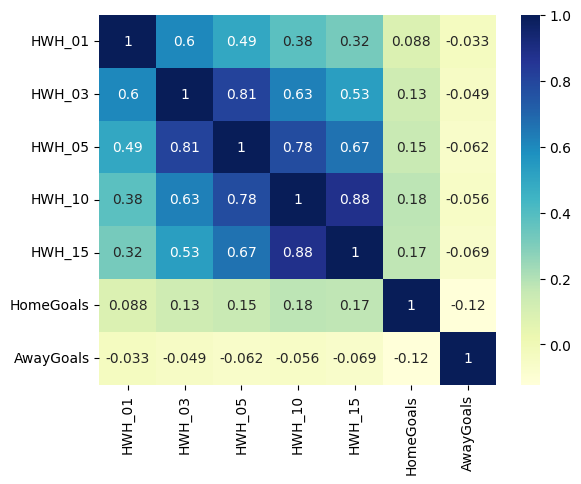

In [41]:
# Select the 10 variables and the 2 target variables
cols = ['HWH_01', 'HWH_03', 'HWH_05', 'HWH_10', 'HWH_15', 'HomeGoals', 'AwayGoals']

# Compute the correlation matrix
corr_matrix = ft[cols].corr()

# Plot a heatmap of the correlation matrix using the Seaborn library
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

based on the above correlation analysis, we choose the following variables for home wins: that are most correlated to home goals 15

In [42]:
#Feature Updates:

#Home Team: Home Wins in last N home matches
ds['HWH_03'] = ds.apply(lambda row: wins_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HWH_15'] = ds.apply(lambda row: wins_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Home Team: Home Losses in last N home matches
ds['HLH_03'] = ds.apply(lambda row: loss_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HLH_15'] = ds.apply(lambda row: loss_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Away Wins in last N away matches
ds['AWA_03'] = ds.apply(lambda row: wins_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['AWA_15'] = ds.apply(lambda row: wins_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Away Losses in last N away matches
ds['ALA_03'] = ds.apply(lambda row: loss_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['ALA_15'] = ds.apply(lambda row: loss_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

ds

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HWH_03,HWH_15,HLH_03,HLH_15,AWA_03,AWA_15,ALA_03,ALA_15
306,2018-08-24,Bayern Munich,Hoffenheim,3,1,2,12,1,1,1,3,1,7
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2,1,9,1,3,0,3,1,5
308,2018-08-25,Freiburg,Ein Frankfurt,0,2,2,7,1,4,0,5,3,8
309,2018-08-25,Hertha,Nurnberg,1,0,1,4,1,5,2,8,0,2
310,2018-08-25,M'gladbach,Leverkusen,2,0,3,8,0,3,1,7,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0,0,3,2,6,1,5,0,5
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0,2,9,0,1,0,6,3,5
3507,2023-03-19,Braunschweig,Hannover,1,0,1,4,1,7,0,4,1,7
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5,0,3,3,9,1,5,2,8


In [43]:
#Feature Updates: GOALS

#Home Team: Goals For in last N home matches
ds['HGF_03'] = ds.apply(lambda row: goals_for_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HGF_15'] = ds.apply(lambda row: goals_for_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Home Team: Goals Against in last N home matches
ds['HGA_03'] = ds.apply(lambda row: goals_against_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HGA_15'] = ds.apply(lambda row: goals_against_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Goals For in last N away matches
ds['AGF_03'] = ds.apply(lambda row: goals_for_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['AGF_15'] = ds.apply(lambda row: goals_for_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Goals Against in last N away matches
ds['AGA_03'] = ds.apply(lambda row: goals_against_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['AGA_15'] = ds.apply(lambda row: goals_against_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

ds

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HWH_03,HWH_15,HLH_03,HLH_15,AWA_03,...,ALA_03,ALA_15,HGF_03,HGF_15,HGA_03,HGA_15,AGF_03,AGF_15,AGA_03,AGA_15
306,2018-08-24,Bayern Munich,Hoffenheim,3,1,2,12,1,1,1,...,1,7,10,49,6,14,6,23,5,28
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2,1,9,1,3,0,...,1,5,5,26,3,18,2,17,4,20
308,2018-08-25,Freiburg,Ein Frankfurt,0,2,2,7,1,4,0,...,3,8,5,17,4,17,2,18,9,26
309,2018-08-25,Hertha,Nurnberg,1,0,1,4,1,5,2,...,0,2,6,20,9,26,6,27,2,13
310,2018-08-25,M'gladbach,Leverkusen,2,0,3,8,0,3,1,...,1,3,8,27,2,19,4,27,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0,0,3,2,6,1,...,0,5,2,14,5,25,5,16,4,18
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0,2,9,0,1,0,...,3,5,5,31,2,13,0,25,4,21
3507,2023-03-19,Braunschweig,Hannover,1,0,1,4,1,7,0,...,1,7,7,18,6,21,2,19,4,22
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5,0,3,3,9,1,...,2,8,0,11,5,20,3,15,6,21


In [44]:
#Feature Updates: Trends

#Home Team: Winning Trend in last N home matches
ds['HWT_03'] = ds.apply(lambda row: trend_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HWT_15'] = ds.apply(lambda row: trend_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Winning Trend in last N away matches
ds['AWT_03'] = ds.apply(lambda row: trend_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['AWT_15'] = ds.apply(lambda row: trend_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

ds

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HWH_03,HWH_15,HLH_03,HLH_15,AWA_03,...,HGA_03,HGA_15,AGF_03,AGF_15,AGA_03,AGA_15,HWT_03,HWT_15,AWT_03,AWT_15
306,2018-08-24,Bayern Munich,Hoffenheim,3,1,2,12,1,1,1,...,6,14,6,23,5,28,0.666667,0.866667,0.500000,0.366667
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2,1,9,1,3,0,...,3,18,2,17,4,20,0.500000,0.700000,0.333333,0.433333
308,2018-08-25,Freiburg,Ein Frankfurt,0,2,2,7,1,4,0,...,4,17,2,18,9,26,0.666667,0.600000,0.000000,0.400000
309,2018-08-25,Hertha,Nurnberg,1,0,1,4,1,5,2,...,9,26,6,27,2,13,0.500000,0.466667,0.833333,0.700000
310,2018-08-25,M'gladbach,Leverkusen,2,0,3,8,0,3,1,...,2,19,4,27,5,19,1.000000,0.666667,0.500000,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0,0,3,2,6,1,...,5,25,5,16,4,18,0.166667,0.400000,0.666667,0.500000
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0,2,9,0,1,0,...,2,13,0,25,4,21,0.833333,0.766667,0.000000,0.533333
3507,2023-03-19,Braunschweig,Hannover,1,0,1,4,1,7,0,...,6,21,2,19,4,22,0.500000,0.400000,0.333333,0.400000
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5,0,3,3,9,1,...,5,20,3,15,6,21,0.000000,0.300000,0.333333,0.400000


In [45]:
#Feature Updates:  Head-to-head record: number of head-to-head games won in the last 2n games (n=3)

#Home Team: Head-to-head games won
ds['HHH_03'] = ds.apply(lambda row: head_to_head_home(row['HomeTeam'],row['AwayTeam'], 3, str(row['Date'])), axis=1)

#Away Team: Head-to-head games won
ds['AHH_03'] = ds.apply(lambda row: head_to_head_away(row['HomeTeam'],row['AwayTeam'], 3, str(row['Date'])), axis=1)

ds

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HWH_03,HWH_15,HLH_03,HLH_15,AWA_03,...,AGF_03,AGF_15,AGA_03,AGA_15,HWT_03,HWT_15,AWT_03,AWT_15,HHH_03,AHH_03
306,2018-08-24,Bayern Munich,Hoffenheim,3,1,2,12,1,1,1,...,6,23,5,28,0.666667,0.866667,0.500000,0.366667,1,1
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2,1,9,1,3,0,...,2,17,4,20,0.500000,0.700000,0.333333,0.433333,0,0
308,2018-08-25,Freiburg,Ein Frankfurt,0,2,2,7,1,4,0,...,2,18,9,26,0.666667,0.600000,0.000000,0.400000,0,0
309,2018-08-25,Hertha,Nurnberg,1,0,1,4,1,5,2,...,6,27,2,13,0.500000,0.466667,0.833333,0.700000,0,0
310,2018-08-25,M'gladbach,Leverkusen,2,0,3,8,0,3,1,...,4,27,5,19,1.000000,0.666667,0.500000,0.633333,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0,0,3,2,6,1,...,5,16,4,18,0.166667,0.400000,0.666667,0.500000,3,2
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0,2,9,0,1,0,...,0,25,4,21,0.833333,0.766667,0.000000,0.533333,0,1
3507,2023-03-19,Braunschweig,Hannover,1,0,1,4,1,7,0,...,2,19,4,22,0.500000,0.400000,0.333333,0.400000,0,2
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5,0,3,3,9,1,...,3,15,6,21,0.000000,0.300000,0.333333,0.400000,1,2


In [46]:
#Feature Update:  Seasonality

#Winter/Not
ds['Winter'] = ds.apply(lambda row: winter(str(row['Date'])), axis=1)
ds['Not_Winter'] = ds.apply(lambda row: not_winter(str(row['Date'])), axis=1)

#Start/End of season
ds['Season_Start'] = ds.apply(lambda row: start_of_season(str(row['Date'])), axis=1)
ds['Season_End'] = ds.apply(lambda row: end_of_season(str(row['Date'])), axis=1)

ds

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HWH_03,HWH_15,HLH_03,HLH_15,AWA_03,...,HWT_03,HWT_15,AWT_03,AWT_15,HHH_03,AHH_03,Winter,Not_Winter,Season_Start,Season_End
306,2018-08-24,Bayern Munich,Hoffenheim,3,1,2,12,1,1,1,...,0.666667,0.866667,0.500000,0.366667,1,1,0,1,1,0
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2,1,9,1,3,0,...,0.500000,0.700000,0.333333,0.433333,0,0,0,1,1,0
308,2018-08-25,Freiburg,Ein Frankfurt,0,2,2,7,1,4,0,...,0.666667,0.600000,0.000000,0.400000,0,0,0,1,1,0
309,2018-08-25,Hertha,Nurnberg,1,0,1,4,1,5,2,...,0.500000,0.466667,0.833333,0.700000,0,0,0,1,1,0
310,2018-08-25,M'gladbach,Leverkusen,2,0,3,8,0,3,1,...,1.000000,0.666667,0.500000,0.633333,0,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0,0,3,2,6,1,...,0.166667,0.400000,0.666667,0.500000,3,2,0,1,0,1
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0,2,9,0,1,0,...,0.833333,0.766667,0.000000,0.533333,0,1,0,1,0,1
3507,2023-03-19,Braunschweig,Hannover,1,0,1,4,1,7,0,...,0.500000,0.400000,0.333333,0.400000,0,2,0,1,0,1
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5,0,3,3,9,1,...,0.000000,0.300000,0.333333,0.400000,1,2,0,1,0,1


In [47]:
#Feature Update:  Shots & Conversion

#Home Team: Shots taken in last N home matches
ds['HST_03'] = ds.apply(lambda row: shots_taken_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HST_15'] = ds.apply(lambda row: shots_taken_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Shots taken in last N away matches
ds['AST_03'] = ds.apply(lambda row: shots_taken_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['AST_15'] = ds.apply(lambda row: shots_taken_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

#Home Team: Conversion Rate in last N home matches
ds['HCR_03'] = ds.apply(lambda row: conversion_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HCR_15'] = ds.apply(lambda row: conversion_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Conversion Rate in last N away matches
ds['ACR_03'] = ds.apply(lambda row: conversion_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['ACR_15'] = ds.apply(lambda row: conversion_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

#Home Team: Shot Accuracy in last N home matches
ds['HSA_03'] = ds.apply(lambda row: shot_accuracy_home(row['HomeTeam'], 3, str(row['Date'])), axis=1)
ds['HSA_15'] = ds.apply(lambda row: shot_accuracy_home(row['HomeTeam'], 15, str(row['Date'])), axis=1)

#Away Team: Shot Accuracy in last N away matches
ds['ASA_03'] = ds.apply(lambda row: shot_accuracy_away(row['AwayTeam'], 3, str(row['Date'])), axis=1)
ds['ASA_15'] = ds.apply(lambda row: shot_accuracy_away(row['AwayTeam'], 15, str(row['Date'])), axis=1)

ds

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HWH_03,HWH_15,HLH_03,HLH_15,AWA_03,...,AST_03,AST_15,HCR_03,HCR_15,ACR_03,ACR_15,HSA_03,HSA_15,ASA_03,ASA_15
306,2018-08-24,Bayern Munich,Hoffenheim,3,1,2,12,1,1,1,...,43,204,20.00,16.96,13.95,11.27,50.00,40.14,39.53,36.27
307,2018-08-25,Fortuna Dusseldorf,Augsburg,1,2,1,9,1,3,0,...,26,175,11.11,12.32,7.69,9.71,37.78,39.34,26.92,33.14
308,2018-08-25,Freiburg,Ein Frankfurt,0,2,2,7,1,4,0,...,25,138,13.51,8.25,8.00,13.04,27.03,28.16,24.00,36.96
309,2018-08-25,Hertha,Nurnberg,1,0,1,4,1,5,2,...,38,185,20.69,13.79,15.79,14.59,51.72,41.38,52.63,44.86
310,2018-08-25,M'gladbach,Leverkusen,2,0,3,8,0,3,1,...,32,200,18.18,12.05,12.50,13.50,31.82,33.48,31.25,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2023-03-18,Regensburg,Paderborn,1,0,0,3,2,6,1,...,36,201,4.76,7.00,13.89,7.96,40.48,35.00,47.22,32.34
3506,2023-03-18,Darmstadt,Kaiserslautern,2,0,2,9,0,1,0,...,37,179,11.11,14.16,0.00,13.97,31.11,34.70,21.62,37.43
3507,2023-03-19,Braunschweig,Hannover,1,0,1,4,1,7,0,...,35,186,14.29,8.87,5.71,10.22,30.61,34.48,31.43,36.02
3508,2023-03-19,Hansa Rostock,Fortuna Dusseldorf,2,5,0,3,3,9,1,...,40,202,0.00,5.42,7.50,7.43,20.51,27.09,32.50,34.16


In [48]:
ds.to_csv('bundesliga_data.csv', index=False)